In [1]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import matplotlib.lines as mlines
import matplotlib.image as mpimg
import matplotlib.patches as patches

from yplot.figure import (
    SubplotLayout,
    calculate_subplot_coordinates,
)
from yplot.layout_utils import (
    calculate_row_spacing,
    convert_coordinates_to_inches,
    expand_subplot_coordinates,
)
from yplot.plotting import create_figure_with_layout
from yplot.util import (
    render_example_figure,
    draw_box_around_figure,
    draw_box_around_subplot,
)
from yplot.style import publication_style_ax

In [2]:
def load_and_fit_image_to_subplot(image_path, ax):
    """
    Load an image from file and stretch it to fit in a subplot.

    Parameters:
    -----------
    image_path : str
        Path to the image file
    subplot_coords : tuple
        Subplot coordinates as (left, bottom, width, height) in figure-relative units
    fig : matplotlib.figure.Figure
        The figure object
    ax : matplotlib.axes.Axes
        The axes object where the image will be placed

    Returns:
    --------
    matplotlib.image.AxesImage
        The image object that was added to the subplot
    """

    # Load the image
    try:
        img = mpimg.imread(image_path)
    except Exception as e:
        raise ValueError(f"Could not load image from {image_path}: {e}")

    # Clear the axes
    ax.clear()

    # Display the image stretched to fit the subplot
    img_plot = ax.imshow(img)

    # Remove axes ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Remove spines
    for spine in ax.spines.values():
        spine.set_visible(False)

    return img_plot

In [3]:
def fill_plots(axes, shared_y_axis=False, shared_x_axis=False):
    for i, ax in enumerate(axes):
        ax.plot([0, 1], [0, 1], color="black")
        publication_style_ax(ax)
        if shared_y_axis and i == 0:
            ax.set_ylabel("y values")
        elif shared_y_axis:
            ax.set_ylabel("")
        else:
            ax.set_ylabel("y values")
        if shared_x_axis and i == 0:
            ax.set_xlabel("x values")
        elif shared_x_axis:
            ax.set_xlabel("")
        else:
            ax.set_xlabel("x values")
    return axes

# Plots

# portrait plots

## 1x4 plot

(0.0, 0.0, 1.7000000000000002, 1.8)


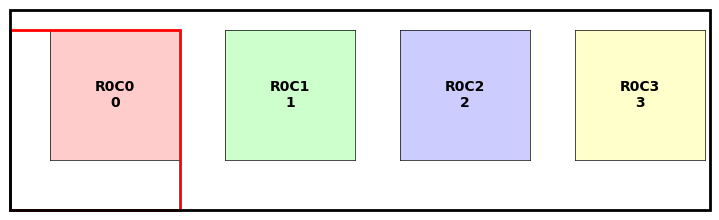

In [12]:
# 1x4 plot with SubplotLayout
layout_dict = {
    "fig_size_inches": (7, 2),
    "rows": 1,
    "cols": 4,
    "row_heights": [1.3],
    "col_widths": [1.3, 1.3, 1.3, 1.3],
    "hspace": [0.45, 0.45, 0.45, 0.45],
    "wspace": [0.50],
    "margins": {"left": 0.40, "right": 0.0, "top": 0.0, "bottom": 0.50},
}
layout = SubplotLayout(config=layout_dict)

# Get coordinates
coords = layout.get_coordinates()

# Visualize the layout
fig = render_example_figure(coords, (7, 2), grid_layout=(1, 4))
expanded_coords = expand_subplot_coordinates(
    coords[0],
    (7, 2),
    margins={"left": 0.4, "right": 0.0, "top": 0.0, "bottom": 0.5},
    spacing={"hspace": 0.45, "wspace": 0.50},
    include_adjacent_spacing=False,
)
draw_box_around_figure(fig)
draw_box_around_subplot(fig, expanded_coords)
print(convert_coordinates_to_inches(expanded_coords, (7, 2)))

(0.0, 0.0, 1.7000000000000002, 1.8)


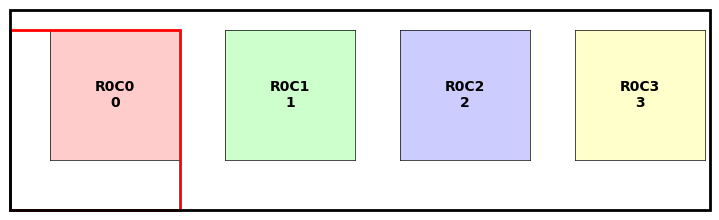

In [5]:
# 1x4 plot with SubplotLayout using row_1 definition
layout_dict = {
    "fig_size": (7, 2),
    "row_1": {
        "size": (1.3, 1.3),
        "hspace": 0.45,
        "wspace": 0.50,
        "margins": {"left": 0.40, "right": 0.0, "top": 0.0, "bottom": 0.50},
        "cols": 4,
    },
}
layout = SubplotLayout(config=layout_dict)

# Get coordinates
coords = layout.get_coordinates()

# Visualize the layout
fig = render_example_figure(coords, (7, 2), grid_layout=(1, 4))
expanded_coords = expand_subplot_coordinates(
    coords[0],
    (7, 2),
    margins={"left": 0.4, "right": 0.0, "top": 0.0, "bottom": 0.5},
    spacing={"hspace": 0.45, "wspace": 0.50},
    include_adjacent_spacing=False,
)
draw_box_around_figure(fig)
draw_box_around_subplot(fig, expanded_coords)
print(convert_coordinates_to_inches(expanded_coords, (7, 2)))

In [6]:
calculate_row_spacing(
    fig_size_inches=(7, 2),
    num_sub_plots=4,
    figure_width=1.3,
    margins={"left": 0.4, "right": 0.0},
)

0.4666666666666666

## 1x4 plot shared y-axis

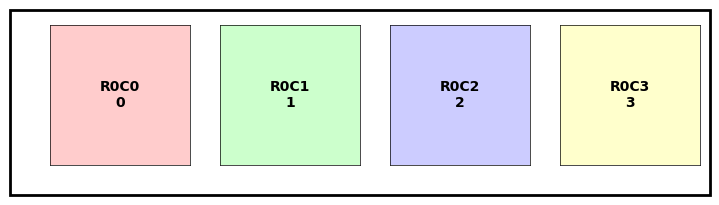

In [7]:
# 1x4 plot with shared y-axis using new dictionary format
layout_dict = {
    "fig_size": (7, 1.85),
    "row_1": {
        "size": (1.4, 1.4),
        "hspace": 0.30,
        "wspace": 0.50,
        "margins": {"left": 0.40, "right": 0.0, "top": 0.0, "bottom": 0.30},
        "cols": 4,
    },
}
layout = SubplotLayout(config=layout_dict)

# Get coordinates
coords = layout.get_coordinates()

# Visualize the layout
fig = render_example_figure(coords, (7, 1.85), grid_layout=(1, 4))
draw_box_around_figure(fig)

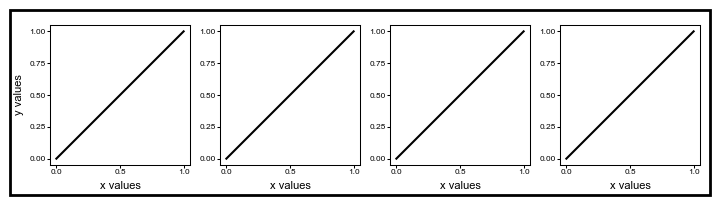

In [8]:
fig = plt.figure(figsize=(7, 1.85))
axes = []
for i in range(4):
    ax = fig.add_axes(coords[i])
    axes.append(ax)
fill_plots(axes, shared_y_axis=True)
draw_box_around_figure(fig)

## 1x3 plot

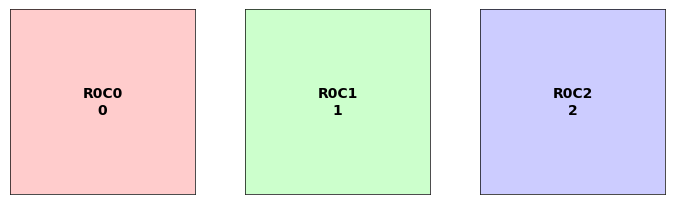

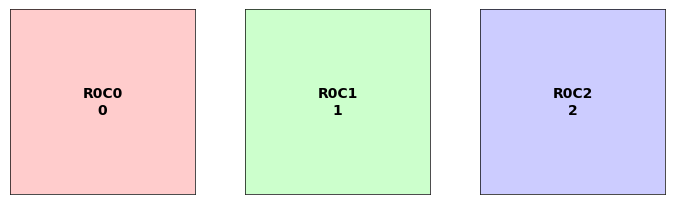

In [9]:
# 1x3 plot with new dictionary format
layout_dict = {
    "fig_size": (7, 2.3),
    "row_1": {
        "size": (1.85, 1.85),
        "hspace": 0.50,
        "wspace": 0.50,
        "margins": {"left": 0.40, "right": 0.0, "top": 0.0, "bottom": 0.30},
        "cols": 3,
    },
}
layout = SubplotLayout(config=layout_dict)

# Get coordinates
coords = layout.get_coordinates()

# Visualize the layout
render_example_figure(coords, (7, 2.3), grid_layout=(1, 3))

## 1x5 plot



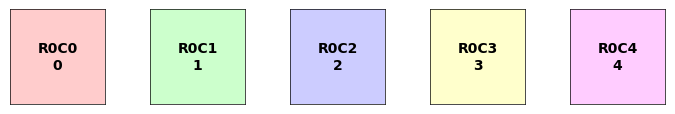

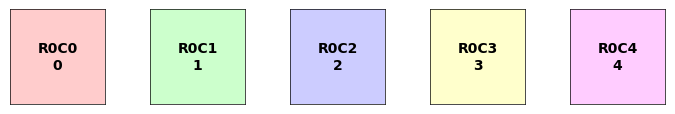

In [10]:
# 1x5 plot with new dictionary format
layout_dict = {
    "fig_size": (7, 1.5),
    "row_1": {
        "size": (0.95, 0.95),
        "hspace": 0.45,
        "wspace": 0.50,
        "margins": {"left": 0.40, "right": 0.0, "top": 0.0, "bottom": 0.30},
        "cols": 5,
    },
}
layout = SubplotLayout(config=layout_dict)

# Get coordinates
coords = layout.get_coordinates()

# Visualize the layout
render_example_figure(coords, (7, 1.5), grid_layout=(1, 5))

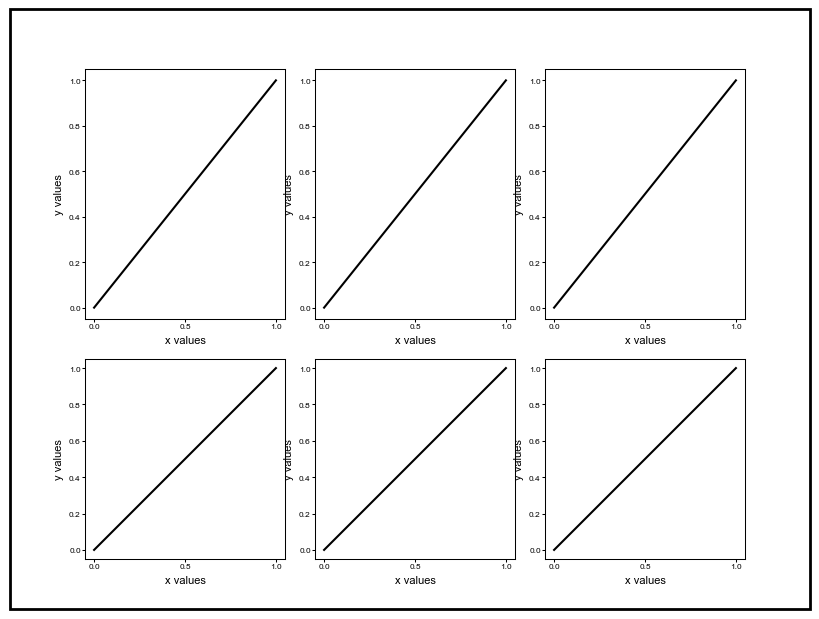

In [11]:
## Using create_figure_with_layout with Dictionary Format

# Create layout using dictionary format
layout_dict = {
    "fig_size": (8, 6),
    "row_1": {
        "size": (2.0, 2.5),
        "hspace": 0.3,
        "wspace": 0.4,
        "margins": {"left": 0.75, "right": 0.75, "top": 0.5, "bottom": 0.25},
        "cols": 3,
    },
    "row_2": {
        "size": (2.0, 2.0),
        "hspace": 0.3,
        "wspace": 0.4,
        "margins": {"left": 0.75, "right": 0.75, "top": 0.25, "bottom": 0.5},
        "cols": 3,
    },
}
layout = SubplotLayout(config=layout_dict)

# Create figure and axes in one step
fig, axes = create_figure_with_layout(layout)

# Fill the plots
fill_plots(axes)
draw_box_around_figure(fig)